<a href="https://colab.research.google.com/github/R4hulR/cat-dog-vision-classifier/blob/main/cat_dog_vision_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install --upgrade duckduckgo_search

In [40]:
from duckduckgo_search import DDGS

def search_images(search_term, max_images=100):
  print(f"Searching for {search_term}")
  results = DDGS().images(search_term, max_results=max_images)
  url = [result['image'] for result in results if 'image' in result]
  return url

In [42]:
urls = search_images('dog photos', max_images=1)
urls[0]

Searching for dog photos


'https://images.pexels.com/photos/551628/pexels-photo-551628.jpeg?cs=srgb&dl=animal-blur-canine-551628.jpg&fm=jpg'

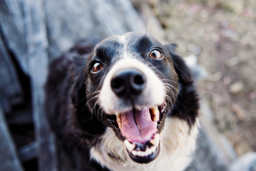

In [43]:
from fastdownload import download_url
from fastai.vision.all import *
dest = 'dog.jpg'
download_url(urls[0], dest, show_progress=False)
im = Image.open(dest)
im.to_thumb(256,256)

Searching for cat photos


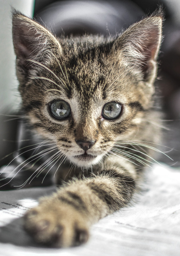

In [54]:
download_url(search_images('cat photos', max_images=1)[0], 'cat.jpg', show_progress=False)
Image.open('cat.jpg').to_thumb(256,256)

In [46]:
from fastai.vision.all import *
from fastcore.all import *
import time

searches = ['cat', 'dog']
path = Path('cat_and_dog')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(10)
    download_images(dest, urls=search_images(f'{o} sun photo'))
    time.sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    time.sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for cat photo
Searching for cat sun photo
Searching for cat shade photo
Searching for dog photo
Searching for dog sun photo
Searching for dog shade photo


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training our model

In [47]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

14

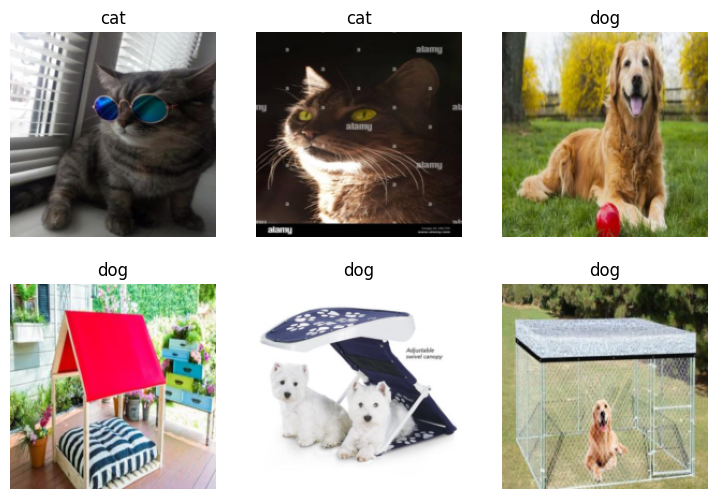

In [48]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [50]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.666192,0.257453,0.111111,01:13


epoch,train_loss,valid_loss,error_rate,time
0,0.219069,0.256194,0.101852,01:38
1,0.126125,0.296857,0.101852,01:38
2,0.107664,0.331838,0.101852,01:39
3,0.084112,0.228594,0.083333,01:39
4,0.062250,0.211431,0.064815,01:38


In [55]:
is_cat,_,probs = learn.predict(PILImage.create('cat.jpg'))
print(f"This is a: {is_cat}.")
print(f"Probability it's a cat: {probs[0]:.4f}")

This is a: cat.
Probability it's a cat: 1.0000
